In [1]:
from langgraph.graph import StateGraph,START,END
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from typing import TypedDict

In [2]:
load_dotenv()

True

In [3]:
llm = ChatOpenAI()

In [4]:
class State(TypedDict):
    topic:str
    outline:str
    blog:str

In [5]:
def get_outline(state:State) -> dict:
    topic = state.get("topic")
    prompt = f"give the detailed outline of this topic: {topic}"
    outline = llm.invoke(prompt).content
    return {"outline":outline}
def get_blog(state:State) ->dict:
    topic = state.get("topic")
    outline = state.get("outline")
    prompt = f"write a detailed blog on topic:{topic} using this outline:\n\n {outline}"
    blog = llm.invoke(prompt).content
    return {'blog':blog}

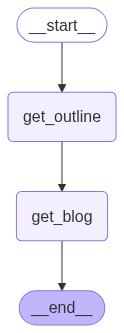

In [7]:
graph = StateGraph(State)
graph.add_node("get_outline",get_outline)
graph.add_node("get_blog",get_blog)
graph.add_edge(START,"get_outline")
graph.add_edge("get_outline","get_blog")
graph.add_edge("get_blog",END)
graph.compile()

In [8]:
workflow = graph.compile()

In [9]:
initial_state = {"topic":"Machine Learning and Mathematics"}
final_state = workflow.invoke(initial_state)
print(final_state)

{'topic': 'Machine Learning and Mathematics', 'outline': 'I. Introduction\n    A. Explanation of machine learning and its increasing importance in various industries\n    B. Introduction to the role of mathematics in machine learning\n\nII. Foundations of Machine Learning\n    A. Overview of machine learning techniques\n    B. Explanation of key concepts such as supervised learning, unsupervised learning, and reinforcement learning\n    C. Importance of mathematical concepts in understanding machine learning algorithms\n\nIII. Mathematics in Machine Learning\n    A. Linear algebra\n        1. Explanation of vectors, matrices, and linear transformations\n        2. Role of linear algebra in representing and manipulating data in machine learning algorithms\n    B. Calculus\n        1. Introduction to derivatives and integrals\n        2. Application of calculus in optimization algorithms used in machine learning\n    C. Probability and statistics\n        1. Fundamentals of probability t

In [10]:
print(final_state["outline"])

I. Introduction
    A. Explanation of machine learning and its increasing importance in various industries
    B. Introduction to the role of mathematics in machine learning

II. Foundations of Machine Learning
    A. Overview of machine learning techniques
    B. Explanation of key concepts such as supervised learning, unsupervised learning, and reinforcement learning
    C. Importance of mathematical concepts in understanding machine learning algorithms

III. Mathematics in Machine Learning
    A. Linear algebra
        1. Explanation of vectors, matrices, and linear transformations
        2. Role of linear algebra in representing and manipulating data in machine learning algorithms
    B. Calculus
        1. Introduction to derivatives and integrals
        2. Application of calculus in optimization algorithms used in machine learning
    C. Probability and statistics
        1. Fundamentals of probability theory and statistical inference
        2. Importance of probabilistic mode

In [11]:
print(final_state["blog"])

Machine Learning and Mathematics

I. Introduction

Machine learning is revolutionizing various industries by enabling computers to learn from data and make decisions without being explicitly programmed. As the field of machine learning continues to grow, the role of mathematics in understanding and developing algorithms becomes increasingly important.

II. Foundations of Machine Learning

Machine learning techniques can be broadly categorized into supervised learning, unsupervised learning, and reinforcement learning. These techniques rely on mathematical concepts such as linear algebra, calculus, probability, and statistics to train models and make predictions accurately.

III. Mathematics in Machine Learning

A. Linear algebra is essential in representing and manipulating data in machine learning algorithms through vectors, matrices, and linear transformations.

B. Calculus is used in optimization algorithms to adjust model parameters to minimize errors.

C. Probability and statistic